# Classifying images patches

### Make sure to download and patchify images before training
you can use this script: `../cnn/1_patchify_images_w_margin.ipynb`

In [3]:
from fastai.vision import *
from pathlib import Path

In [4]:
input_dir = Path('../data/smoky_images')
dataset_dir = input_dir / 'dataset'

## Verify images

In [5]:
classes = ['smoky', 'cleany']

In [6]:
for folder in classes:
    print(folder)
    verify_images(dataset_dir / folder, delete=True, max_size=500)

## View data

In [15]:
np.random.seed(42)
data = ImageDataBunch.from_folder(dataset_dir, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(max_rotate=None, max_zoom=1, max_warp=None), 
                                  size=224, num_workers=4) #.normalize(imagenet_stats)

In [16]:
data.classes

['cleany', 'smoky']

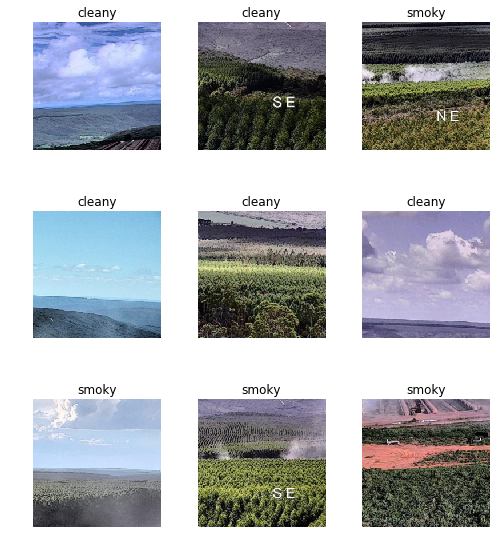

In [17]:
data.show_batch(rows=3, figsize=(7, 8))

In [19]:
data.classes, len(data.train_ds), len(data.valid_ds)

(['cleany', 'smoky'], 5172, 1292)

## Training

In [32]:
from fastai.metrics import error_rate # 1 - accuracy
learn = create_cnn(data, models.resnet34, metrics=error_rate)

C:\ProgramData\Anaconda3\lib\site-packages\fastai\vision\learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [33]:
defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.616533,0.427223,0.183437,01:48
1,0.464712,0.369938,0.157895,01:50
2,0.380715,0.332094,0.137771,01:51
3,0.337061,0.325693,0.138545,01:49


In [34]:
learn.unfreeze()

In [35]:
learn.lr_find(start_lr=1e-9)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


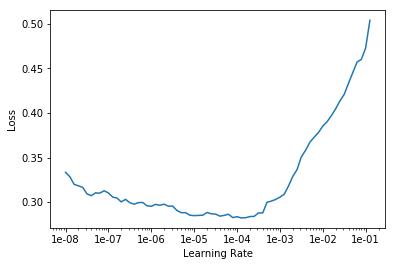

In [36]:
learn.recorder.plot()

In [37]:
learn.fit_one_cycle(4, max_lr=slice(3e-6, 3e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.307802,0.314168,0.130031,01:42
1,0.280119,0.297903,0.119195,01:50
2,0.233299,0.289430,0.115325,01:53
3,0.213994,0.285059,0.119195,01:55


In [38]:
learn.save('patch-classifier-stage-1')

## Looking at top losses

In [46]:
interp = ClassificationInterpretation.from_learner(learn)

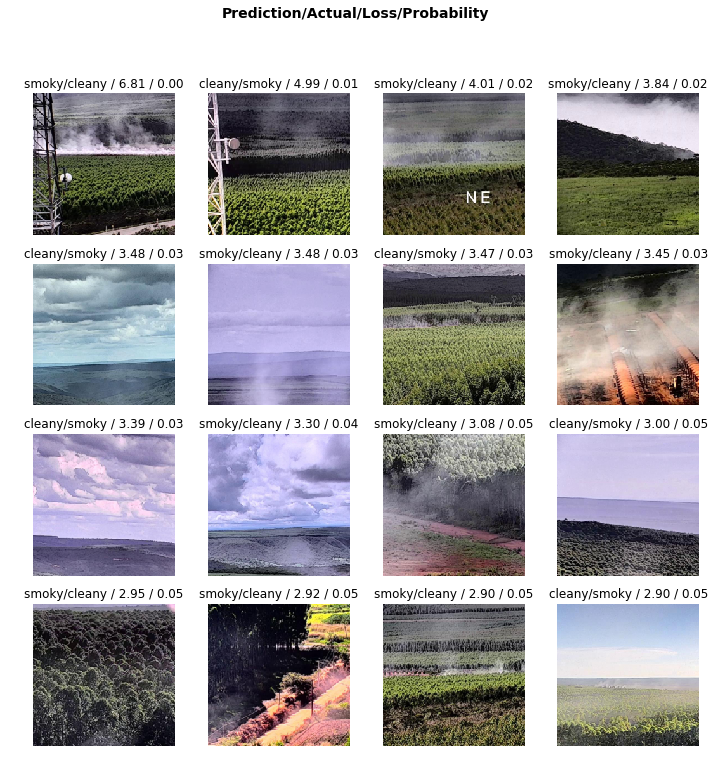

In [48]:
interp.plot_top_losses(16)

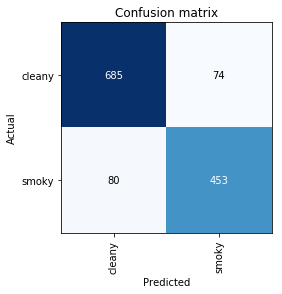

In [49]:
interp.plot_confusion_matrix()

In [50]:
losses, idxs = interp.top_losses(16)
data.valid_ds.x.items[idxs]

array([WindowsPath('../data/smoky_images/dataset/cleany/766_ck1qcie56flad07948fxkfm50_8.png'),
       WindowsPath('../data/smoky_images/dataset/smoky/847_ck1ql3dbrkntk0748qwnfb0l9_4.png'),
       WindowsPath('../data/smoky_images/dataset/cleany/623_ck1p6t3pk539d0944drm6omug_7.png'),
       WindowsPath('../data/smoky_images/dataset/cleany/391_ck1p1strn4ga40944rokqxd38_4.png'),
       WindowsPath('../data/smoky_images/dataset/smoky/874_ck1qmeg2tprkc0838drpp9adr_2.png'),
       WindowsPath('../data/smoky_images/dataset/cleany/1138_ck1rkltvz6w640944wnd5hum6_0.png'),
       WindowsPath('../data/smoky_images/dataset/smoky/330_ck1owh5nn6h0f0757akhnz4br_5.png'),
       WindowsPath('../data/smoky_images/dataset/cleany/789_ck1qd45wa1k5k08112oco056f_10.png'),
       WindowsPath('../data/smoky_images/dataset/smoky/1100_ck1qyg2xrraff0794q3q13whb_1.png'),
       WindowsPath('../data/smoky_images/dataset/cleany/255_ck1oucc81igrs0811mp3jmif7_2.png'),
       WindowsPath('../data/smoky_images/dataset/cl

## Interpretation

In [41]:
interp = ClassificationInterpretation.from_learner(learn)

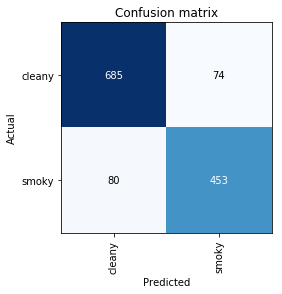

In [42]:
interp.plot_confusion_matrix()